# 🧠 Problem Statement: Velocity Profile Estimation Around a Curve

In autonomous navigation or high-speed vehicle motion, determining the safe and optimal **velocity profile** around curves is essential for stability, comfort, and control. The goal is to compute the **maximum allowable speed** a vehicle can travel while navigating a curve, constrained by physical limits such as road friction and curvature.

This notebook focuses on computing the velocity based on given curvature values along a path, using physical principles involving friction and centripetal acceleration.

---


$$
v <= \sqrt{\frac{\mu \cdot g}{\kappa}}
$$

**Where:**  
- $v$: velocity at the curve  
- $\mu$: friction coefficient  
- $g$: $9.81\, \text{m/s}^2$  
- $\kappa$: curvature at the point $(1/\text{radius})$

## 📈 What is a Velocity Profile?

A **velocity profile** refers to the set of optimal or feasible speeds assigned to each point along a trajectory/path based on local conditions — such as sharpness of curves, surface friction, or speed limits. It ensures the vehicle maintains:

- Safety (no slipping or skidding)
- Comfort (smooth transitions)
- Performance (efficient traversal)

For high-curvature regions (tight turns), velocity is naturally reduced to avoid loss of traction. The velocity must also be clipped by a maximum velocity limit imposed by system capabilities or regulation.

Clipping is applied as:

$$
v_{\text{final}} = \min(v, v_{\text{max}})
$$

---



## 🎯 Deliverables

Your task is to:

1. Implement a function to compute the **velocity profile** given curvature values and a friction coefficient.
2. Apply **velocity clipping** based on a specified $v_{\text{max}}$.
3. Visualize the resulting velocity profile over the path using matplotlib.
4. Test the function with synthetic or real curvature data.
5. Optionally: Extend the analysis to account for variable friction or slope.

---

## ✅ Outcome

By the end of this notebook, we should be able to generate a smooth, physically-constrained velocity profile for any given trajectory, which can be used in motion planning modules of autonomous systems.

### 🧠 Hints to Guide Your Implementation

1. **Use the curvature to compute the maximum allowable velocity** at each waypoint based on the friction limits.  
   👉 Hint: Think about how centripetal force relates to velocity and radius.

2. **Iterate forward through the waypoints** to create a preliminary velocity profile using maximum acceleration and deceleration.  
   👉 Hint: Use kinematics — the change in velocity squared is proportional to force and distance.

3. **Refine your velocity profile by doing a backward pass** to ensure smooth deceleration into turns.  
   👉 Hint: The final velocity should never exceed what the vehicle can decelerate to in the next segment.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mu = 0.5
g = 9.8

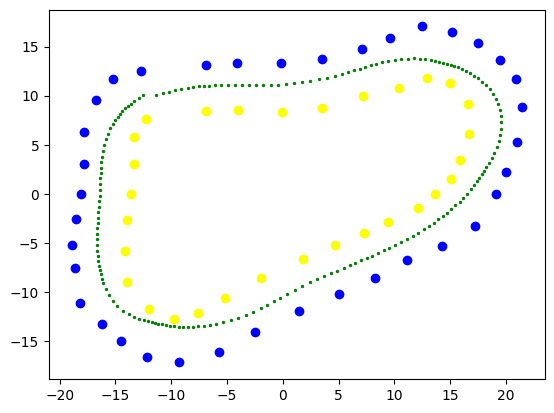

In [10]:
blue_cones = np.load('blue_cones.npy')
yellow_cones = np.load('yellow_cones.npy')
waypoints = np.load('waypoints.npy')

plt.scatter(blue_cones[:,0],blue_cones[:,1],c = 'blue')
plt.scatter(yellow_cones[:,0],yellow_cones[:,1],c = "yellow")

plt.scatter(waypoints[:,0],waypoints[:,1],s=2,c = "green")